In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [2]:
# Read noisy heart rate data
df = pl.read_csv("noisy_heart_rate_time_series.csv")
time = df["t"].to_numpy()
hr_accurate_orig = df["heart_rate_accurate"].to_numpy()
hr_noisy_orig = df["heart_rate_noisy"].to_numpy()


In [3]:
# Normalize data
hr_accurate_mean = np.mean(hr_accurate_orig)
hr_accurate_std = np.std(hr_accurate_orig)
hr_accurate = (hr_accurate_orig - hr_accurate_mean) / hr_accurate_std
hr_noisy = (hr_noisy_orig - hr_accurate_mean) / hr_accurate_std

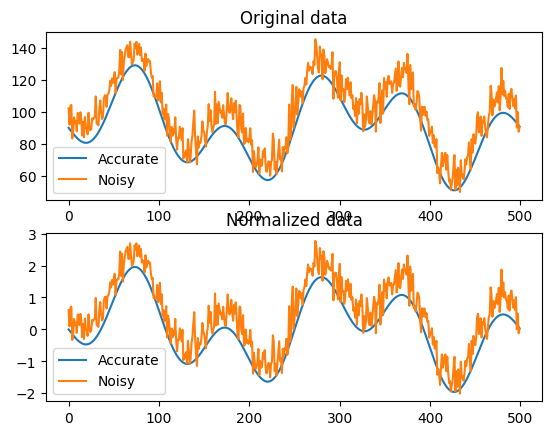

In [4]:
# PLot original data and normalized data
fig, ax = plt.subplots(2, 1)
ax[0].plot(time, hr_accurate_orig, label="Accurate")
ax[0].plot(time, hr_noisy_orig, label="Noisy")
ax[0].legend()
ax[0].set_title("Original data")
ax[1].plot(time, hr_accurate, label="Accurate")
ax[1].plot(time, hr_noisy, label="Noisy")
ax[1].legend()
ax[1].set_title("Normalized data")
plt.show()

In [29]:
w1 = 0.1
w2 = 0.1
b = 0.0
# learning_rate = 0.01
learning_rate = 0.05  # 0.1
# learning_rate_w1 = 0.00001
# learning_rate_w2 = 0.00001
# learning_rate_b = 0.1

n_epochs = 300

## To do: Use loss across whole epoch rather that sample-by-sample!

In [30]:
# for _ in range(n_epochs):
#     hr_pred = []
#     y_prev = 0.0
#     for x, y in zip(hr_noisy, hr_accurate):
#         y_pred = w1 * x + w2 * y_prev + b
#         hr_pred.append(y_pred)
#         error = y - y_pred
#         update = learning_rate * 2 * error
#         w1 += update * x
#         w2 += update * y_prev
#         b += update
#         y_prev = y_pred
#     print(f"w1: {w1}, w2: {w2}, b: {b}")


In [ ]:
learning_rate_scaled = learning_rate

for _ in range(n_epochs):
    hr_pred = []
    errors = []
    memory_values = []
    updates = []

    y_prev = 0.0
    for x, y in zip(hr_noisy, hr_accurate):
        y_pred = w1 * x + w2 * y_prev + b
        hr_pred.append(y_pred)
        error = y - y_pred
        errors.append(error)
        memory_values.append(y_prev)
        y_prev = y_pred
    mse = np.mean(np.array(errors) ** 2)
    print(f"Epoch {_ + 1}/{n_epochs}, MSE: {mse}")

    errors = np.array(errors)
    memory_values = np.array(memory_values)
    w1 += learning_rate * 2 * np.mean(errors * hr_noisy)
    w2 += learning_rate * 2 * np.mean(errors * memory_values)
    b += learning_rate * 2 * np.mean(errors)

    # learning_rate *= 0.99  # Decay learning rate
    print(f"w1: {w1}, w2: {w2}, b: {b}")

Epoch 1/300, MSE: 0.7922317686515608
w1: 0.1858505744548375, w2: 0.10963669432570475, b: -0.00550443045451357
Epoch 2/300, MSE: 0.6360931788279217
w1: 0.2579374553186706, w2: 0.1250897830031422, b: -0.015129869092038575
Epoch 3/300, MSE: 0.5172826063170474
w1: 0.3183506051480484, w2: 0.14378930690140937, b: -0.027749952373622627
Epoch 4/300, MSE: 0.42472382185062596
w1: 0.36875173115688686, w2: 0.1640289533648725, b: -0.04247873260542679
Epoch 5/300, MSE: 0.3515466615621892
w1: 0.4105367982741581, w2: 0.1846517102375729, b: -0.058590711460549574
Epoch 6/300, MSE: 0.2931428427042432
w1: 0.44491972688682346, w2: 0.20487954801821834, b: -0.07548127762548873
Epoch 7/300, MSE: 0.24623552263746343
w1: 0.4729757609826199, w2: 0.22420844948476656, b: -0.09264661737586251
Epoch 8/300, MSE: 0.2083959210788604
w1: 0.4956631722760995, w2: 0.24233576799267756, b: -0.10967291401611305
Epoch 9/300, MSE: 0.17777418546828352
w1: 0.5138337222099557, w2: 0.25910553877247217, b: -0.12622932839894396
Epoch

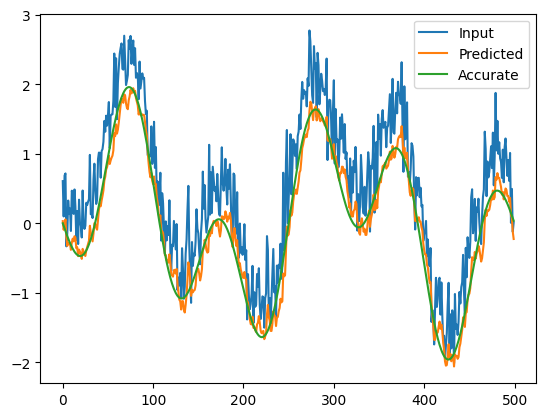

In [28]:
plt.plot(hr_noisy, label="Input")
plt.plot(hr_pred, label="Predicted")
plt.plot(hr_accurate, label="Accurate")
plt.legend()
plt.show()
